In [15]:
import numpy as np
x = np.array([[5],[7],[10]])
y=np.array([[15.367240],[17.158241],[18.895075]])

In [16]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
x= scaler_x.fit_transform(x)

/Users/kewinkuster/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/kewinkuster/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [17]:
scaler_y = StandardScaler()
y= scaler_y.fit_transform(y)
print(y)

[[-1.23096482]
 [ 0.01253614]
 [ 1.21842868]]


#Formula da regressão linear simples
y= b0 + b1 * x

In [18]:
np.random.seed(0)
np.random.rand(2)

array([0.5488135 , 0.71518937])

In [19]:
import tensorflow as tf

In [20]:
b0=tf.Variable(0.54)
b1=tf.Variable(0.71)

In [21]:
erro = tf.losses.mean_squared_error(y, (b0 + b1 *x))
otimizador = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
treinamento = otimizador.minimize(erro)
init = tf.global_variables_initializer()

In [22]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(30000):
        sess.run(treinamento)
    b0_final, b1_final = sess.run([b0,b1])
    print(sess.run(b0))
    print(sess.run(b1))

5.954669e-08
0.9923286


In [23]:
print(scaler_x.inverse_transform([[b0_final]]))
print(scaler_x.inverse_transform([[b1_final]]))
previsoes = b0_final + b1_final*x


[[7.3333335]]
[[9.372375]]


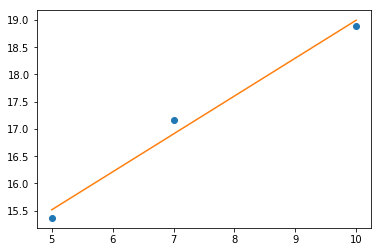

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
previsoes1= scaler_y.inverse_transform(previsoes)
y1= scaler_y.inverse_transform(y)
x1= scaler_x.inverse_transform(x)
plt.plot(x1,y1,'o')
plt.plot(x1,previsoes1)

In [14]:
previsao = scaler_y.inverse_transform(b0_final + b1_final * scaler_x.transform([[40]]))
previsao

array([[39.86181533]])

In [15]:
y1= scaler_y.inverse_transform(y)
y1

array([[15.36724 ],
       [17.158241],
       [18.895075]])

In [16]:
previsoes1 = scaler_y.inverse_transform(previsoes)
previsoes1

array([[15.51721185],
       [16.90833205],
       [18.99501235]])

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y1, previsoes1)
mse = mean_squared_error(y1, previsoes1)
print(mae)
print(mse)

0.16660605065592785
0.031644504335910636
